<a href="https://colab.research.google.com/github/RileyWClarke/MLTSA_COVID19/blob/master/COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLTSA COVID-19 Project

In [0]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
% matplotlib inline

In [0]:
plt.style.use("https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/master/fbb.mplstyle")

In [0]:
!pip install kaggle

In [0]:
from google.colab import drive

drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!pwd

/content


In [0]:
cd gdrive/My\ Drive/

/content/gdrive/My Drive


In [0]:
ls kaggle.json

kaggle.json


In [0]:
!chmod 600 kaggle.json

In [0]:
import json
import os
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

In [0]:
!kaggle datasets list -s coronavirus

ref                                                             title                                                size  lastUpdated          downloadCount  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
unanimad/corona-virus-brazil                                    Coronavirus - Brazil                                  4KB  2020-03-18 23:06:05            803  
jamzing/sars-coronavirus-accession                              SARS CORONAVIRUS ACCESSION                            2MB  2020-02-18 15:49:34           2377  
brendaso/2019-coronavirus-dataset-01212020-01262020             2019 Coronavirus dataset (January - February 2020)   53KB  2020-02-06 18:09:28           9029  
paultimothymooney/coronavirus-genome-sequence                   Coronavirus Genome Sequence                           9MB  2020-02-29 00:25:13            397  
gpreda/coronavirus-2019ncov             

In [0]:
!mkdir COVID19

In [0]:
cd COVID19

/content/gdrive/My Drive/COVID19


In [0]:
!mkdir data

In [0]:
cd data

/content/gdrive/My Drive/COVID19/data


In [0]:
!kaggle datasets download kimjihoo/coronavirusdataset

  0% 0.00/356k [00:00<?, ?B/s]
100% 356k/356k [00:00<00:00, 24.6MB/s]


In [0]:
ls

coronavirusdataset.zip


In [0]:
!unzip coronavirusdataset.zip

Archive:  coronavirusdataset.zip
  inflating: Case.csv                
  inflating: PatientInfo.csv         
  inflating: PatientRoute.csv        
  inflating: Region.csv              
  inflating: SearchTrend.csv         
  inflating: Time.csv                
  inflating: TimeAge.csv             
  inflating: TimeGender.csv          
  inflating: TimeProvince.csv        
  inflating: Weather.csv             


In [0]:
ts = pd.read_csv('Time.csv')
ts.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [0]:
ts.shape

(57, 7)

In [0]:
ts['date'] = pd.to_datetime(ts['date'])
ts

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0
5,2020-01-25,16,27,25,2,0,0
6,2020-01-26,16,51,47,3,0,0
7,2020-01-27,16,61,56,4,0,0
8,2020-01-28,16,116,97,4,0,0
9,2020-01-29,16,187,155,4,0,0


In [0]:
ts.columns

Index(['date', 'time', 'test', 'negative', 'confirmed', 'released',
       'deceased'],
      dtype='object')

In [0]:
ts.set_index("date", inplace=True)

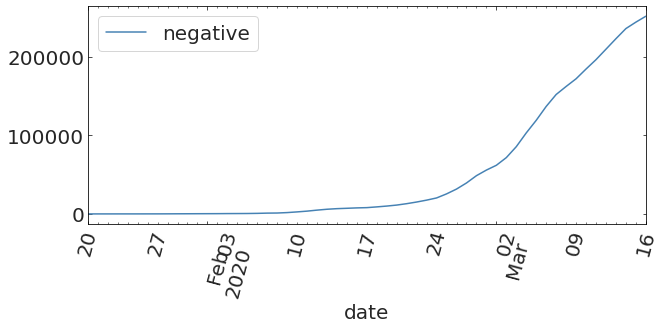

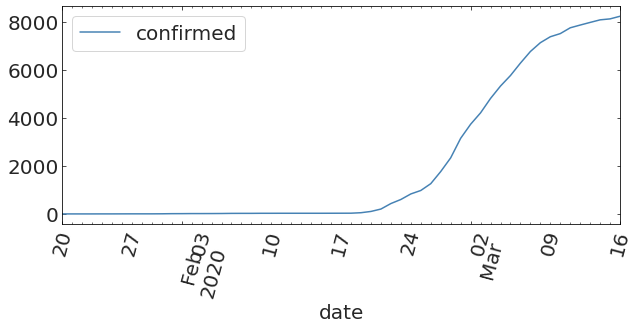

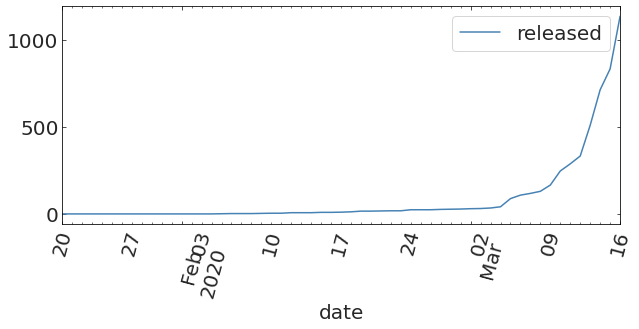

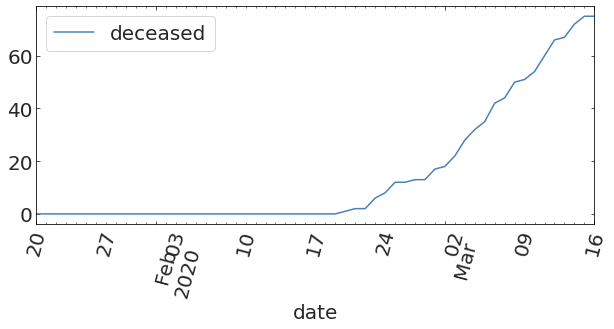

In [0]:
for c in ts.columns[2:]:
    fig, ax = plt.subplots(figsize=(10,4))
    ts.plot(y=c, ax=ax, rot=75)